In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange, tqdm
from datetime import datetime,timedelta
import random

In [2]:
df_ts_balance = pd.read_csv('E:\\Data\\divvy\\df_ts_balance_1721.csv',parse_dates=['time_stamp'])
df_ts_in_1721 = pd.read_csv('E:\Data\divvy/df_ts_in_1721.csv',parse_dates=['time_stamp'])
df_ts_out_1721= pd.read_csv('E:\Data\divvy/df_ts_out_1721.csv',parse_dates=['time_stamp'])

In [7]:
df_weather_p1 = pd.read_csv('E:\Data\divvy/Chicago_WeatherPart1 2017-01-01 to 2019-06-30.csv')
df_weather_p2 = pd.read_csv('E:\Data\divvy/Chicago_WeatherPart2 2019-07-01 to 2021-12-31.csv')
df_weater = pd.concat([df_weather_p1, df_weather_p2])
df_stations = pd.read_csv('E:\Data\divvy/Divvy_stations_community.csv',index_col =0)

In [3]:
df_ts_balance.head()

,time_stamp,Greenwood Ave & 79th St,Milwaukee Ave & Grand Ave,California Ave & Milwaukee Ave,Ellis Ave & 55th St,Keystone Ave & Montrose Ave,Halsted St & Archer Ave,Stetson Ave & South Water St,Calumet Ave & 51st St,Damen Ave & Charleston St,...,Broadway & Belmont Ave,Lincoln Ave & Sunnyside Ave,Halsted St & 35th St,Wentworth Ave & 24th St (Temp),Sheridan Rd & Noyes St (NU),Leavitt St & Lawrence Ave,Kedzie Ave & Roosevelt Rd,Artesian Ave & Hubbard St,Dorchester Ave & 49th St,Damen Ave & Pershing Rd
0,2017-01-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-01 00:40:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-01-01 00:50:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
try:
    df_ts_balance = df_ts_balance.drop(columns =['date-hour'],axis=1)
except:
    pass 
df_ts_balance.insert(0,'date-hour',df_ts_balance.time_stamp.apply(lambda x:f"{str(x.date())} {x.hour}:00:00"))
df_ts_balance['date-hour'] = df_ts_balance['date-hour'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [5]:
df_ts_balance.groupby('date-hour').sum()

,Greenwood Ave & 79th St,Milwaukee Ave & Grand Ave,California Ave & Milwaukee Ave,Ellis Ave & 55th St,Keystone Ave & Montrose Ave,Halsted St & Archer Ave,Stetson Ave & South Water St,Calumet Ave & 51st St,Damen Ave & Charleston St,Vincennes Ave & 75th St,...,Broadway & Belmont Ave,Lincoln Ave & Sunnyside Ave,Halsted St & 35th St,Wentworth Ave & 24th St (Temp),Sheridan Rd & Noyes St (NU),Leavitt St & Lawrence Ave,Kedzie Ave & Roosevelt Rd,Artesian Ave & Hubbard St,Dorchester Ave & 49th St,Damen Ave & Pershing Rd
date-hour,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 01:00:00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 03:00:00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01 13:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-01 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-09-01 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_weater.columns

Index(['name', 'datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'conditions',
       'icon', 'stations'],
      dtype='object')

In [8]:
df_weater.head()    

,name,datetime,temp,feelslike,dew,humidity,precip,precipprob,preciptype,snow,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,conditions,icon,stations
0,Chicago,2017-01-01T00:00:00,25.5,19.2,19.1,76.43,0.0,0.0,NaN,0.0,...,1016.1,0.0,9.9,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
1,Chicago,2017-01-01T01:00:00,24.4,19.5,18.2,77.15,0.0,0.0,NaN,0.0,...,1016.6,0.0,9.9,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
2,Chicago,2017-01-01T02:00:00,23.6,23.6,17.6,77.55,0.0,0.0,NaN,0.0,...,1017.2,0.0,9.9,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
3,Chicago,2017-01-01T03:00:00,23.5,17.6,18.5,80.81,0.0,0.0,NaN,0.0,...,1017.9,0.0,9.8,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."
4,Chicago,2017-01-01T04:00:00,22.4,14.6,17.3,80.40,0.0,0.0,NaN,0.0,...,1018.3,18.0,9.4,0.0,NaN,0,NaN,Clear,clear-night,"72534014819,KORD,KMDW,72530094846,74466504838,..."


In [14]:
df_weater['datetime'] = df_weater.datetime.apply(lambda x:datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

In [15]:
df_weater['datetime'].head()

0   2017-01-01 00:00:00
1   2017-01-01 01:00:00
2   2017-01-01 02:00:00
3   2017-01-01 03:00:00
4   2017-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [16]:
df_weater.isna().sum()

name                    0
datetime                0
temp                    0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob           9069
preciptype          40936
snow                    0
snowdepth               0
windgust            30775
windspeed               0
winddir                 0
sealevelpressure        0
cloudcover              0
visibility              0
solarradiation          0
solarenergy         18890
uvindex                 0
severerisk          43824
conditions              0
icon                    0
stations                0
dtype: int64

In [17]:
df_weater[['precip','precipprob']].describe()

,precip,precipprob
count,43824.000000,34755.000000
mean,0.004144,8.309596
std,0.026340,27.603118
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.010000,100.000000


In [13]:
df_weater_temp = df_weater.set_index('datetime',drop=True)

<AxesSubplot:xlabel='datetime'>

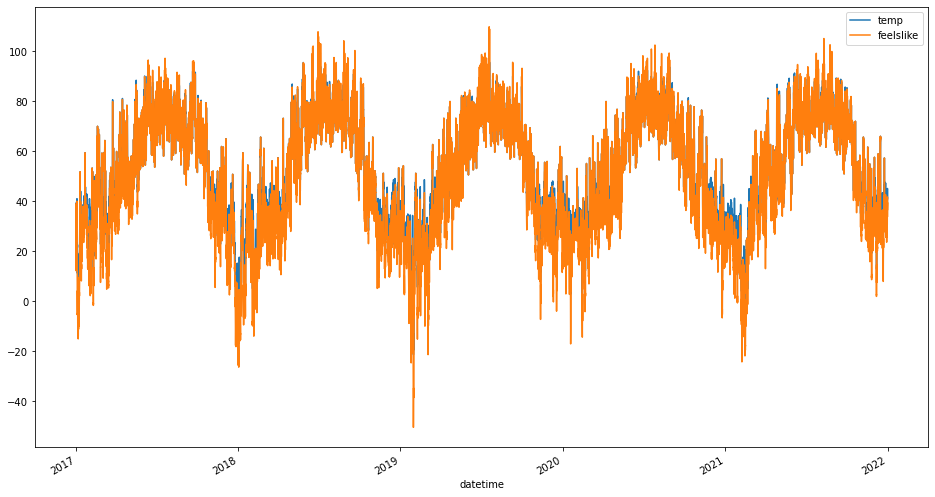

In [15]:
df_weater_temp[['temp','feelslike']].plot(figsize=(16,9))

In [16]:
df_ts_balance_temp = df_ts_balance.groupby('date-hour').sum()

<AxesSubplot:xlabel='date-hour'>

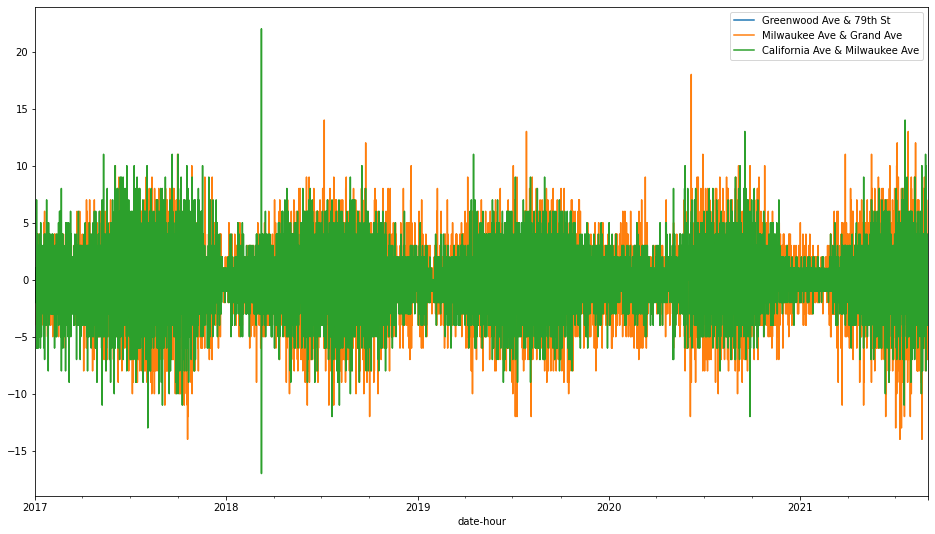

In [17]:
df_ts_balance_temp_sample = df_ts_balance_temp[df_ts_balance_temp.columns[:3]]
df_ts_balance_temp_sample.plot(figsize =(16,9))

Text(0, 0.5, 'dock delta')

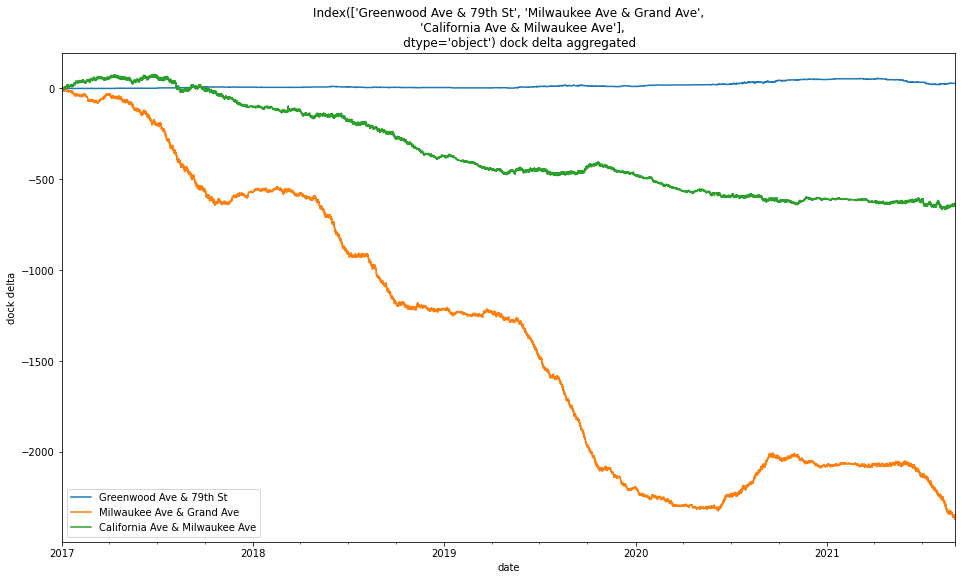

In [20]:
#This plots aggregated delta (assuming no staff manuvouring)
hour_row = 1
day_row = 24 * hour_row
n_days = 365*5
station_name = df_ts_balance_temp_sample.columns[0:5]#'Lake Park Ave & 47th St'
df_ts_balance_temp_sample[station_name][:n_days*day_row].cumsum().plot(figsize=(16,9))
plt.title(f'{station_name} dock delta aggregated')
plt.xlabel('date')
plt.ylabel('dock delta')
# df_ts_in[station_name].cumsum().plot(figsize=(16,9))
# df_ts_out[station_name].cumsum().plot(figsize=(16,9))

In [21]:
df_ts_balance_temp_sample

,Greenwood Ave & 79th St,Milwaukee Ave & Grand Ave,California Ave & Milwaukee Ave
date-hour,,,
2017-01-01 00:00:00,0.0,0.0,0.0
2017-01-01 01:00:00,0.0,0.0,1.0
2017-01-01 02:00:00,0.0,0.0,0.0
2017-01-01 03:00:00,0.0,0.0,-2.0
2017-01-01 04:00:00,0.0,0.0,0.0
...,...,...,...
2021-09-01 13:00:00,0.0,0.0,0.0
2021-09-01 14:00:00,0.0,0.0,0.0
2021-09-01 15:00:00,0.0,0.0,0.0


Text(0, 0.5, 'Cum-Sum dock delta, reset daily')

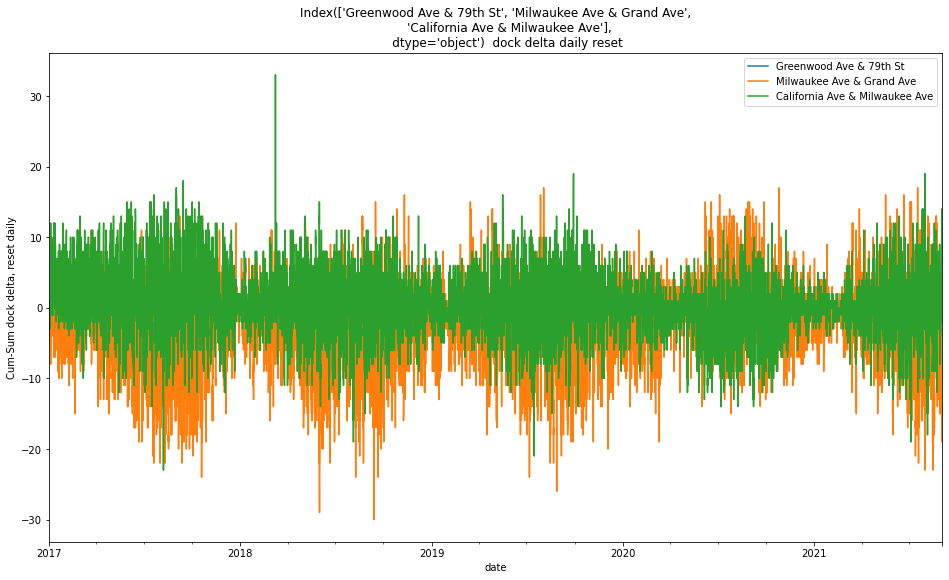

In [22]:
#This plots aggregated delta (assuming no staff manuvouring)
Index_col = 'date-hour'
hour_row = 1
day_row = 24 * hour_row
n_days = 365*5
#This plots rolling cumsum, resetting each day. 
df_ts_balance_temp_sample = df_ts_balance_temp_sample.reset_index()
try:
    df_ts_balance_temp_sample.insert( 0, 'date' ,df_ts_balance_temp_sample[Index_col].apply(lambda x:x.date()))
except ValueError:
    pass 
df_ts_balance_temp_sample = df_ts_balance_temp_sample.set_index(Index_col,drop=True)
df_ts_balance_CS = df_ts_balance_temp_sample.groupby('date').cumsum()
#Plotting
station_name = df_ts_balance_CS.columns[0:5]#'Lake Park Ave & 47th St'
df_ts_balance_CS[station_name][:n_days*day_row].plot(figsize=(16,9))
plt.title(f'{station_name}  dock delta daily reset')
plt.xlabel('date')
plt.ylabel('Cum-Sum dock delta, reset daily')

In [27]:
df_ts_balance_temp_daily_agg = df_ts_balance_temp.reset_index()
df_ts_balance_temp_daily_agg['date-hour'] = df_ts_balance_temp_daily_agg['date-hour'].apply(lambda x:x.date())
df_ts_balance_temp_daily_agg = df_ts_balance_temp_daily_agg.groupby('date-hour').sum()

<AxesSubplot:xlabel='date-hour'>

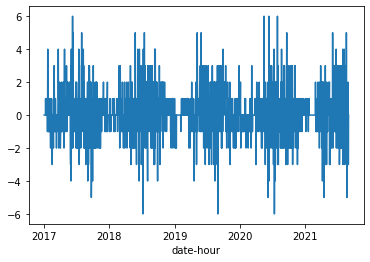

In [36]:
df_ts_balance_temp_daily_agg['Keystone Ave & Montrose Ave'].plot()

In [18]:
df_weater['day']= df_weater.datetime.apply(lambda x:x.date())
df_weater_daily_agg = df_weater.groupby('day')[['temp','feelslike','dew','humidity']].mean()

In [ ]:
df_station_weather = df_ts_balance_temp_daily_agg.join(df_weater_daily_agg,how='left')

In [65]:
selected_stations = random.sample(list(df_station_weather.columns),k=10)
print(selected_stations)
corr_matrix = df_station_weather[selected_stations+['temp','feelslike','dew','humidity']].corr()

['Franklin St & Illinois St', 'Cottage Grove Ave & 43rd St', 'Knox Ave & Montrose Ave', 'Ellis Ave & 83rd St', 'Damen Ave & Chicago Ave', 'Wells St & Concord Ln', 'Michigan Ave & 71st St', 'Halsted St & 18th St', 'Kenton Ave & Madison St', 'Lincoln Park Conservatory']


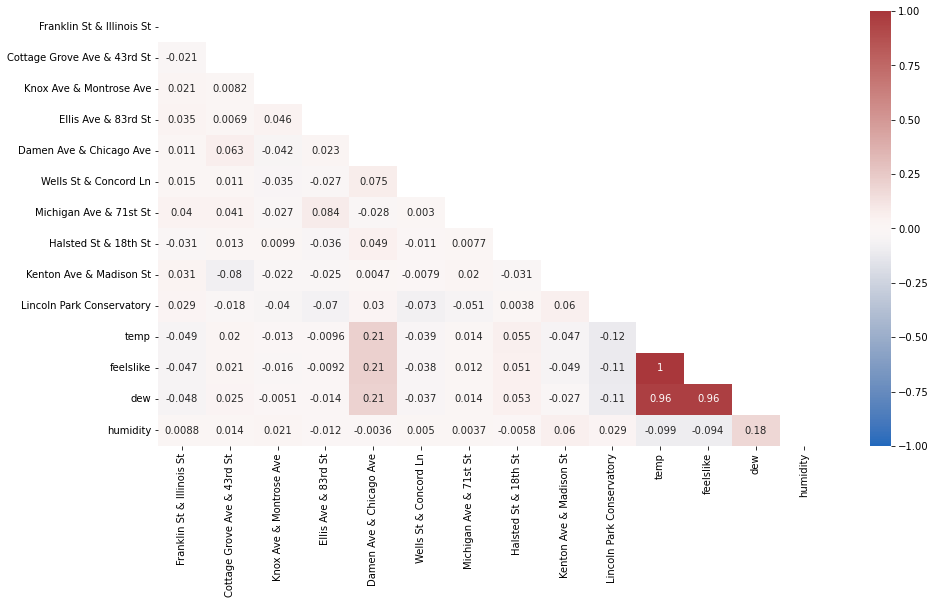

In [66]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

<AxesSubplot:xlabel='date-hour'>

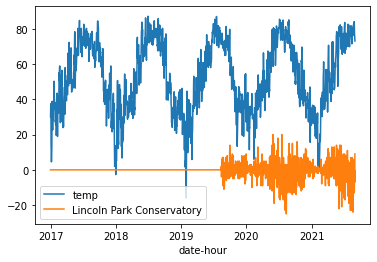

In [68]:
df_station_weather[['temp','Lincoln Park Conservatory']].plot()

# Run similiar analysis on df_ts_in_1721

In [9]:
df_ts_in_1721.insert(0,'day', df_ts_in_1721['time_stamp'].apply(lambda x:x.date()))

In [10]:
df_ts_in_1721_agg_daily = df_ts_in_1721.groupby('day').sum()

<AxesSubplot:xlabel='day'>

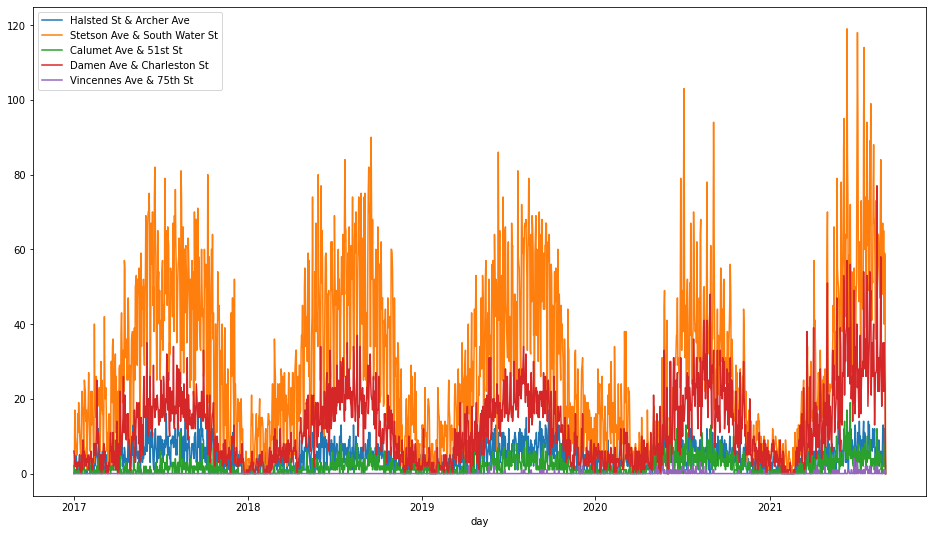

In [11]:
df_ts_in_1721_agg_daily[df_ts_in_1721_agg_daily.columns[5:10]].plot(figsize =(16,9))

In [21]:
df_station_IN_weather = df_ts_in_1721_agg_daily.join(df_weater_daily_agg,how='left')

In [34]:
selected_stations = random.sample(list(df_station_IN_weather.columns),k=10)
print(selected_stations)
corr_matrix = df_station_IN_weather[selected_stations+['temp','feelslike','dew','humidity']].corr()

['Keystone Ave & Fullerton Ave', 'Ashland Ave & 21st St', 'Ashland Ave & 66th St', 'Talman Ave & Addison St', 'State St & 29th St', 'Kedzie Ave & Chicago Ave', 'Cicero Ave & Lake St', 'Prairie Ave & 43rd St', 'Damen Ave & Cullerton St', 'Ashland Ave & Garfield Blvd']


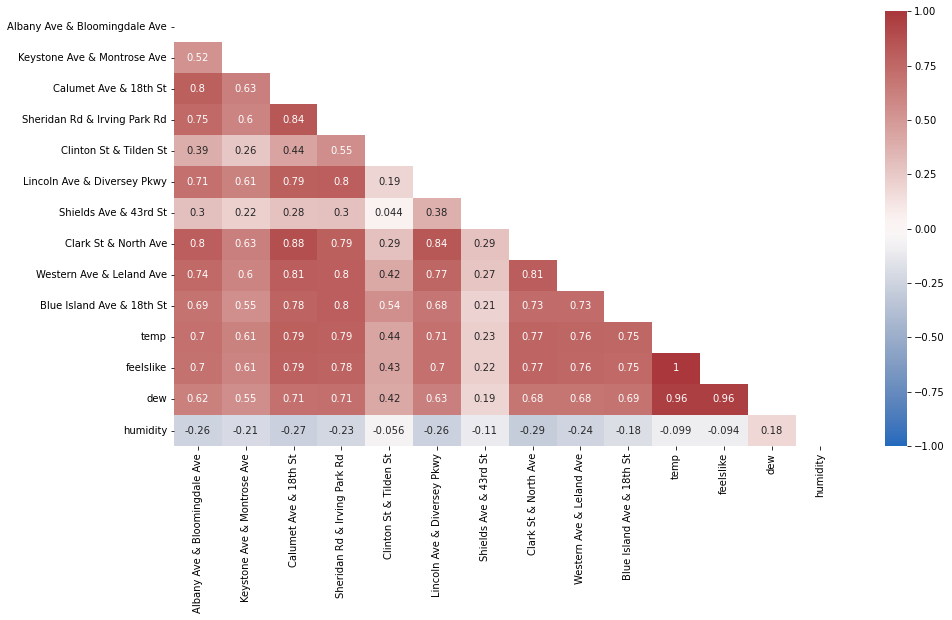

In [27]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

### Geo Graphic Correlation Analysis
1. Calculate correlation between all station TS-IN &temp
2. Join with station table and dropna 
3. Geo plot color coded by correlation

In [55]:
corr_with_temp = df_station_IN_weather.corr()['temp']
corr_with_temp = pd.DataFrame(corr_with_temp).reset_index().rename({'index':'station_name','temp':'Ts_IN_cor_with_temp'},axis=1)

In [59]:
df_stations_temp = df_stations.merge(corr_with_temp,how='left')#.isna().sum()

D:\Anaconda3\envs\msca\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlate temperature with stations Volume-In')

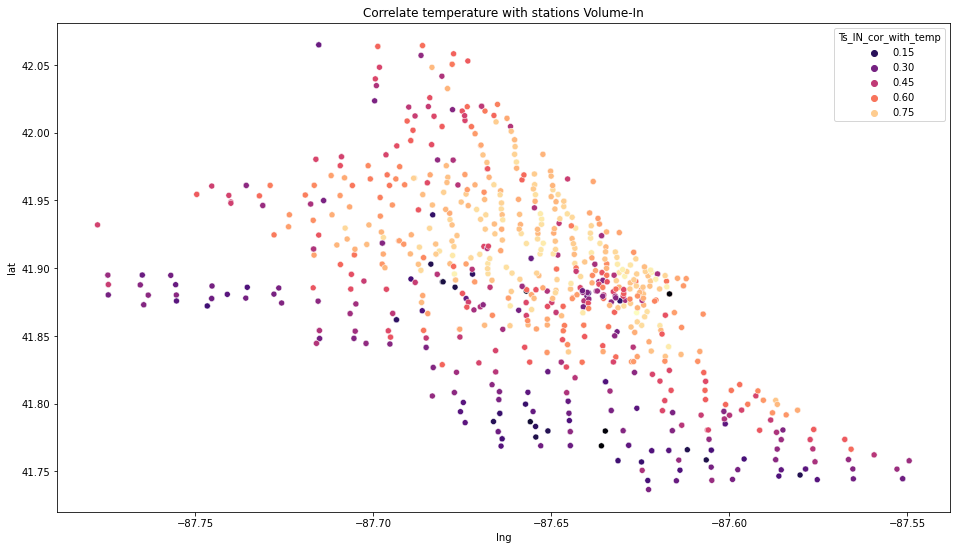

In [66]:
plt.figure(figsize=(16,9))
sns.scatterplot(df_stations_temp['lng'],df_stations_temp['lat'],hue = df_stations_temp['Ts_IN_cor_with_temp'],palette='magma')
plt.title('Correlate temperature with stations Volume-In')

In [88]:
from pygeocoder import Geocoder
import folium
import branca.colormap as cmp

In [124]:
sns.color_palette('icefire')

[(0.33355526, 0.64107876, 0.80445484),
 (0.28708711, 0.32912157, 0.69034504),
 (0.15652427, 0.15348248, 0.22238175),
 (0.22994394, 0.13076731, 0.15146314),
 (0.61319563, 0.1824336, 0.2687872),
 (0.91463791, 0.43668557, 0.21367954)]

In [125]:
colormap = cmp.StepColormap(
 eval(sns.color_palette('icefire').as_hex().__str__()),
 vmin=df_stations_temp['Ts_IN_cor_with_temp'].min(), vmax=df_stations_temp['Ts_IN_cor_with_temp'].max(),
  #for change in the colors, not used fr linear
 caption='Color Scale for Map'    #Caption for Color scale or Legend
)
colormap
# df_stations_temp['marker_color'] = pd.cut(df_stations_temp['Ts_IN_cor_with_temp'], bins=4, 
#                               labels=['blue', 'green','yellow','red'])

In [128]:
CHICAGO_COORDINATES = (41.864073, -87.706819)
# for speed purposes
MAX_RECORDS = 100

# create empty map zoomed in on San Francisco
map = folium.Map(location=CHICAGO_COORDINATES, zoom_start=11)

In [129]:
# add a marker for every record in the filtered data
for idx,row in df_stations_temp.iterrows():
    folium.Circle(
        location = (row['lat'],row['lng']),
        radius = 2,
        color = colormap(row['Ts_IN_cor_with_temp'])
        ).add_to(map)
map.add_child(colormap)
display(map)